In [1]:
import random
import numpy as np
import torch
from skimage import data
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import normalize

im = data.astronaut()
im = np.swapaxes(im, 0, 2)
#im = torch.from_numpy(im)
nbin = random.randint(32,128)


In [2]:
# (512, 512, 3)
# (3, 512, 512)
# (3, 512, 512)
im.shape
im = im.numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [ ]:
plt.imshow(im.swapaxes(0, 2))
gray_img = cv2.cvtColor(np.swapaxes(im, 0, 2), cv2.COLOR_BGR2GRAY)
type(gray_img)

In [ ]:
plt.imshow(gray_img, cmap='gray')

In [ ]:
hi = cv2.calcHist([im[2]], [0], None, [256], [0, 255])
im[2].shape

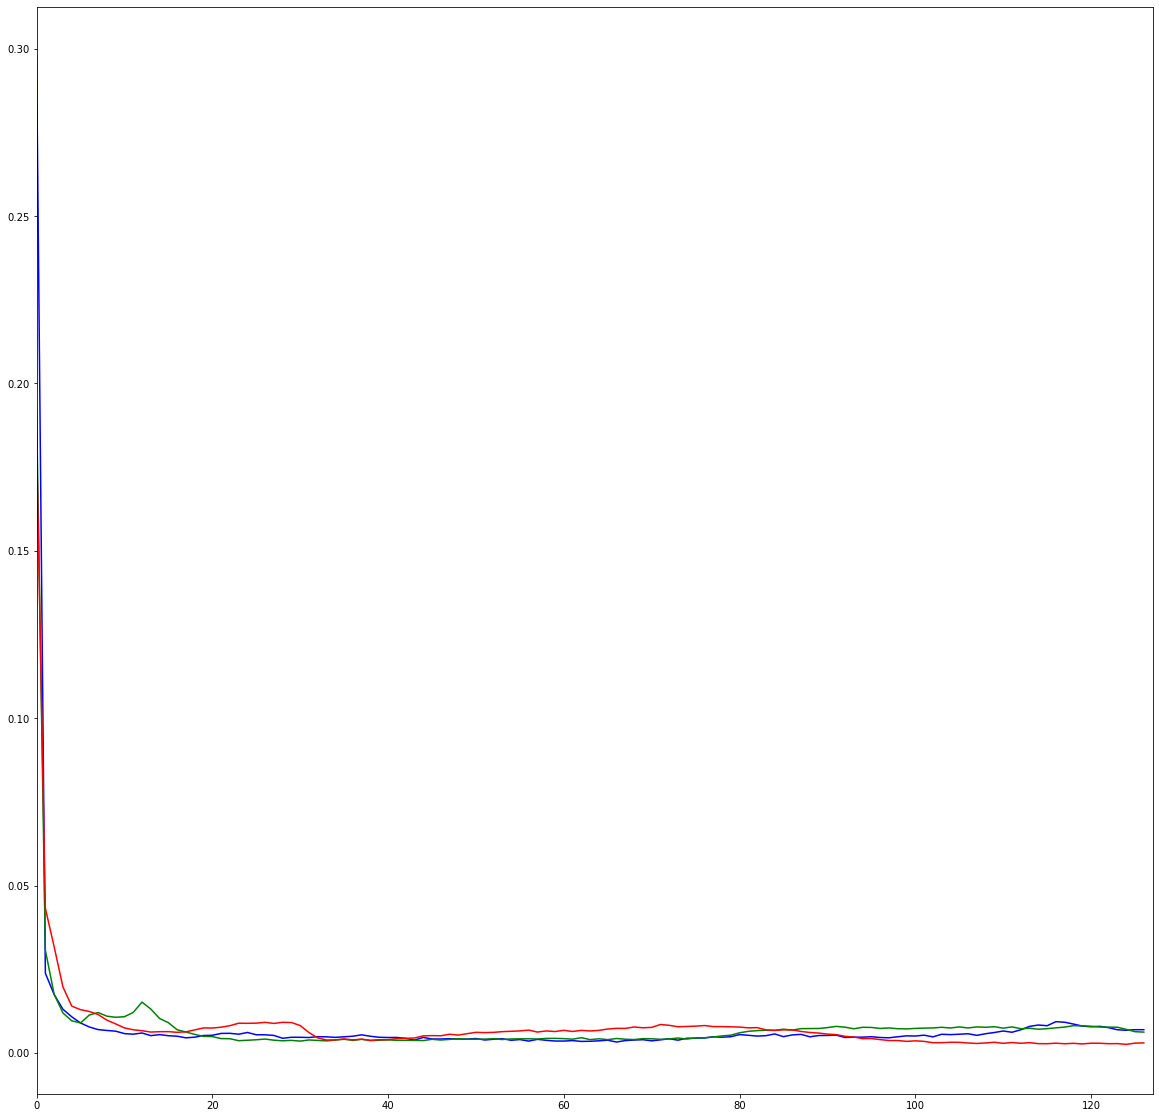

In [3]:
colors = ['b', 'g', 'r']

all_hist = []
plt.figure(figsize=(20, 20))
for i,c in enumerate(colors):
    hist = cv2.calcHist([im[i]], [0], None, [nbin], [0, nbin])
    all_hist.extend(list(hist))
    hist = normalize(hist, norm='l1', axis=0)    
    plt.plot(hist, color=c)
    plt.xlim([0,nbin])

In [4]:
'''colors = ['b', 'g', 'r']

all_hist = []
plt.figure(figsize=(20, 20))
for i,c in enumerate(colors):
    hist = (cv2.calcHist([im[i]], [0], None, [nbin], [0, nbin]) / (im.shape[1] * im.shape[2]))
    all_hist.extend(list(hist))
    plt.plot(hist, color=c)
    plt.xlim([0,nbin])'''

"colors = ['b', 'g', 'r']\n\nall_hist = []\nplt.figure(figsize=(20, 20))\nfor i,c in enumerate(colors):\n    hist = (cv2.calcHist([im[i]], [0], None, [nbin], [0, nbin]) / (im.shape[1] * im.shape[2]))\n    all_hist.extend(list(hist))\n    plt.plot(hist, color=c)\n    plt.xlim([0,nbin])"

In [5]:
count.shape


NameError: name 'count' is not defined

In [6]:
'''im0 = im[0].ravel()
plt.hist(im0, 256, [0, 256])
im1 = im[1].ravel()
plt.hist(im1, 256, [0, 256])
im2 = im[2].ravel()
plt.hist(im2, 256, [0, 256])'''

im0 = im[0].ravel()
hist1 = np.histogram(im0, nbin, (0, nbin))[0]
im1 = im[1].ravel()
hist2 = np.histogram(im1, nbin, (0, nbin))[0]
im2 = im[2].ravel()
hist3 = np.histogram(im2, nbin, (0, nbin))[0]

In [7]:
im0, count0 = np.unique(im[0].ravel(), return_counts=True)
im1, count1 = np.unique(im[1].ravel(), return_counts=True)
im2, count2 = np.unique(im[2].ravel(), return_counts=True)

In [42]:
# copy paste
nbin = 50
im = im.astype(np.int32)
res = (im * nbin) // 256
vals0, count0 = np.unique(res[0], return_counts=True)
vals1, count1 = np.unique(res[1], return_counts=True)
vals2, count2 = np.unique(res[2], return_counts=True)
hist_tot = np.concatenate((count0, count1, count2), axis=0)
hist_tot = hist_tot / (im.shape[1]*im.shape[2] * 3)
out = torch.from_numpy(hist_tot)
out = out.type(torch.float32)
out

tensor([0.0450, 0.0041, 0.0033, 0.0030, 0.0035, 0.0029, 0.0029, 0.0030, 0.0031,
        0.0025, 0.0024, 0.0022, 0.0021, 0.0023, 0.0026, 0.0030, 0.0038, 0.0030,
        0.0028, 0.0030, 0.0033, 0.0038, 0.0052, 0.0048, 0.0042, 0.0050, 0.0040,
        0.0041, 0.0039, 0.0040, 0.0045, 0.0051, 0.0057, 0.0084, 0.0099, 0.0107,
        0.0107, 0.0106, 0.0115, 0.0154, 0.0141, 0.0173, 0.0156, 0.0143, 0.0147,
        0.0103, 0.0051, 0.0016, 0.0013, 0.0040, 0.0526, 0.0108, 0.0116, 0.0055,
        0.0039, 0.0036, 0.0037, 0.0037, 0.0044, 0.0040, 0.0040, 0.0041, 0.0041,
        0.0040, 0.0042, 0.0053, 0.0080, 0.0073, 0.0072, 0.0071, 0.0074, 0.0073,
        0.0072, 0.0077, 0.0064, 0.0058, 0.0041, 0.0038, 0.0038, 0.0040, 0.0045,
        0.0057, 0.0063, 0.0098, 0.0099, 0.0089, 0.0096, 0.0113, 0.0097, 0.0089,
        0.0088, 0.0077, 0.0035, 0.0022, 0.0020, 0.0019, 0.0012, 0.0009, 0.0008,
        0.0028, 0.0616, 0.0101, 0.0066, 0.0069, 0.0086, 0.0090, 0.0045, 0.0040,
        0.0057, 0.0058, 0.0065, 0.0065, 

array([32, 32, 32, 31, 32, 32, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 34, 32, 31, 30, 28, 26, 25,
       23, 20, 17, 15, 11,  8,  6,  4,  3,  3,  4,  4,  4,  4,  4,  4,  5,
        4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  4,  4,  5,  5,  5,
        4,  5,  4,  6,  8,  8,  7,  5,  5,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  4,  4,  4,  6, 11,
       16, 21, 26, 30, 32, 33, 33, 34, 34, 34, 34, 34, 33, 33, 34, 34, 34,
       34, 34, 34, 34, 34, 34, 33, 33, 31, 30, 28, 26, 24, 22, 22, 21, 21,
       21, 21, 22, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20,
       19, 19, 18, 18, 18, 17, 17, 18, 18, 17, 17, 16, 17, 16, 16, 16, 16,
       16, 16, 16, 16, 15, 15, 16, 15, 16, 15, 15, 15, 15, 15, 15, 15, 14,
       16, 15, 16, 15, 16, 16, 16, 17, 17, 18, 18, 18, 18, 19, 20, 22, 23,
       24, 26, 27, 28, 29, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 30,
       30, 30, 30, 29, 30

<BarContainer object of 216 artists>

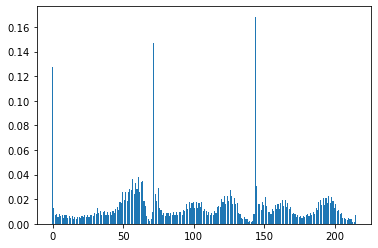

In [26]:
#rapresentation

l = [str(i) for i in range(0, nbin*3)]
x = np.arange(len(l))
width = 0.35

plt.bar(x - width/2, list(hist_tot))


In [125]:
hist_tot[0]

0.12776947021484375

In [31]:
nbin

72